In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/293.3 kB ? eta -:--:--
     ----------                              81.9/293.3 kB 1.5 MB/s eta 0:00:01
     -------------------------              194.6/293.3 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
train=pd.read_csv('sign_mnist_train.csv')
test=pd.read_csv('sign_mnist_test.csv')

In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [8]:
train.shape

(27455, 785)

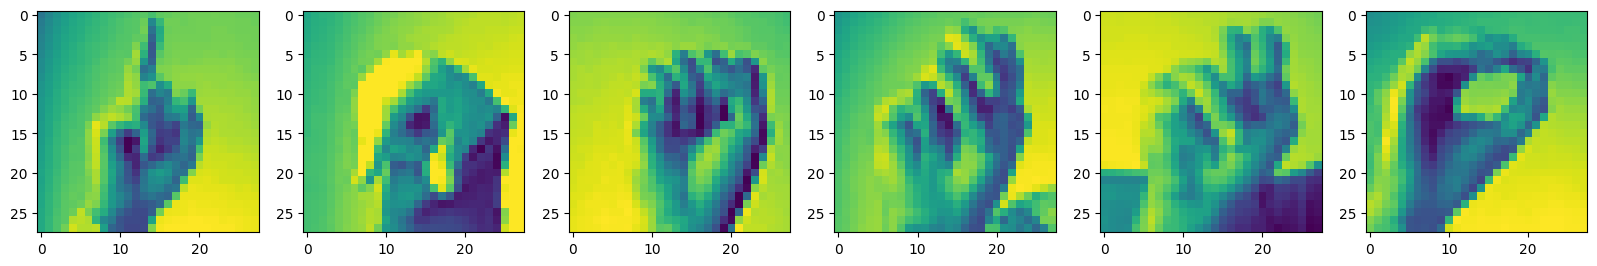

In [9]:
#Data visualization
f=plt.figure(figsize=(20,6))
ax=f.add_subplot(161)
ax2=f.add_subplot(162)
ax3=f.add_subplot(163)
ax4=f.add_subplot(164)
ax5=f.add_subplot(165)
ax6=f.add_subplot(166)
ax.imshow(train.iloc[0].values[1:].reshape(28,28))
ax2.imshow(train.iloc[5].values[1:].reshape(28,28))
ax3.imshow(train.iloc[20].values[1:].reshape(28,28))
ax4.imshow(train.iloc[456].values[1:].reshape(28,28))
ax5.imshow(train.iloc[999].values[1:].reshape(28,28))
ax6.imshow(train.iloc[1500].values[1:].reshape(28,28))

plt.show()

<Axes: ylabel='count'>

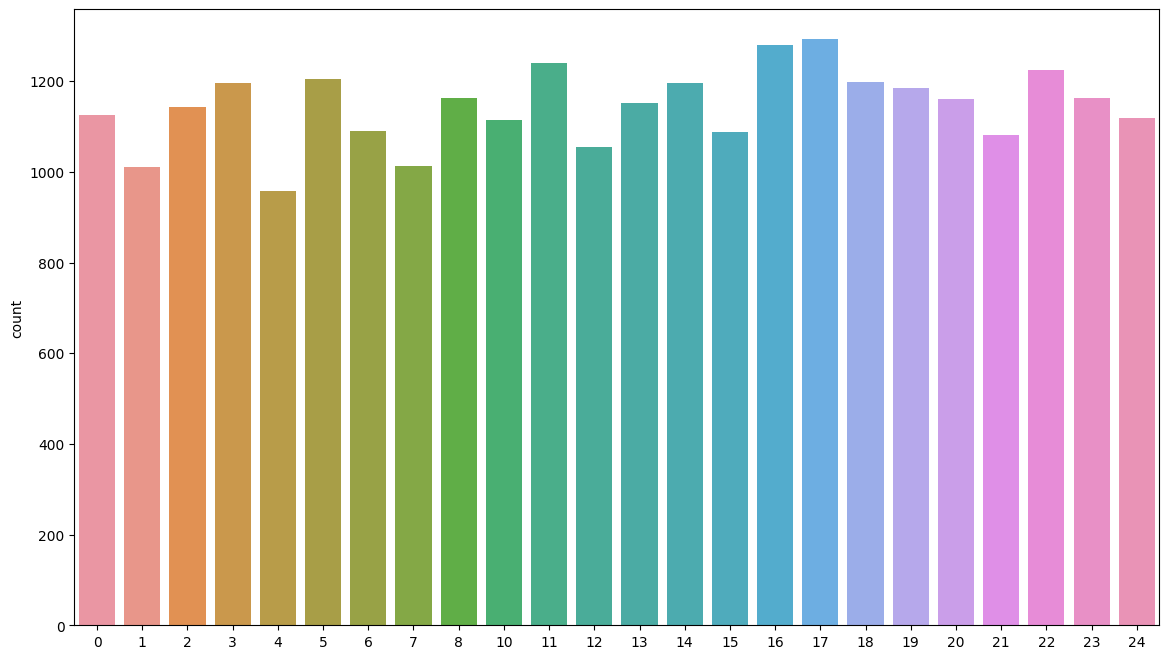

In [10]:
labels = train['label'].values
plt.figure(figsize = (14,8))
sns.countplot(x =labels)

In [11]:
X_train = train.drop(["label"],axis=1)
X_test = test.drop(["label"],axis=1)
Y_train = train['label']
Y_test = test['label']
del train['label']
del test['label']

In [12]:
#Data normalization,CNN works faster
X_train = X_train/255.0
X_test = X_test/255.0
X_train.shape
X_test.shape

(7172, 784)

In [13]:
#Reshaping
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)
X_train.shape
X_test.shape

(7172, 28, 28, 1)

In [14]:
#Label encoding
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
Y_train = label_binrizer.fit_transform(Y_train)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (21964, 28, 28, 1)
x_test shape (5491, 28, 28, 1)
y_train shape (21964, 24)
y_test shape (5491, 24)


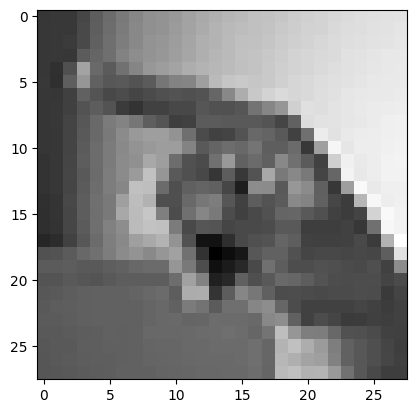

In [18]:
plt.imshow(X_train[12][:,:,0],cmap="gray")
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'same', input_shape=(28, 28, 1)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(128, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(512, activation='relu'),
                        tf.keras.layers.Dense(24, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 512)         590336    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 512)        0

In [20]:
#optimizer = Adam(lr=0.003, beta_1=0.9, beta_2=0.999)

model.compile( optimizer='rmsprop' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [21]:
epochs = 50 
batch_size = 200

In [22]:
#Data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=15, 
        zoom_range = 0.5,
        width_shift_range=0.15,  
        height_shift_range=0.15, 
        horizontal_flip=True,  
        vertical_flip=False)  

datagen.fit(X_train)

Text(0.5, 1.0, 'label: 13  letter: M')

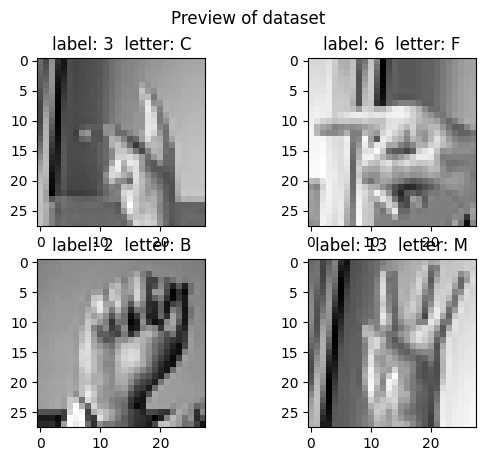

In [31]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

In [23]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)


Epoch 1/50


C:\Users\dines\AppData\Local\Temp\ipykernel_5892\1193075716.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)


109/109 [==============================] - 89s 810ms/step - loss: 3.1444 - accuracy: 0.0611 - val_loss: 2.9204 - val_accuracy: 0.1268
Epoch 2/50
109/109 [==============================] - 88s 806ms/step - loss: 2.7189 - accuracy: 0.1735 - val_loss: 1.9370 - val_accuracy: 0.3892
Epoch 3/50
109/109 [==============================] - 89s 815ms/step - loss: 2.2309 - accuracy: 0.2962 - val_loss: 1.7053 - val_accuracy: 0.4451
Epoch 4/50
109/109 [==============================] - 93s 851ms/step - loss: 1.7426 - accuracy: 0.4359 - val_loss: 0.7624 - val_accuracy: 0.7673
Epoch 5/50
109/109 [==============================] - 92s 841ms/step - loss: 1.2950 - accuracy: 0.5715 - val_loss: 0.6749 - val_accuracy: 0.7683
Epoch 6/50
109/109 [==============================] - 91s 832ms/step - loss: 0.9892 - accuracy: 0.6706 - val_loss: 0.5302 - val_accuracy: 0.8254
Epoch 7/50
109/109 [==============================] - 91s 833ms/step - loss: 0.7565 - accuracy: 0.7450 - val_loss: 0.2854 - val_accuracy: 0.9

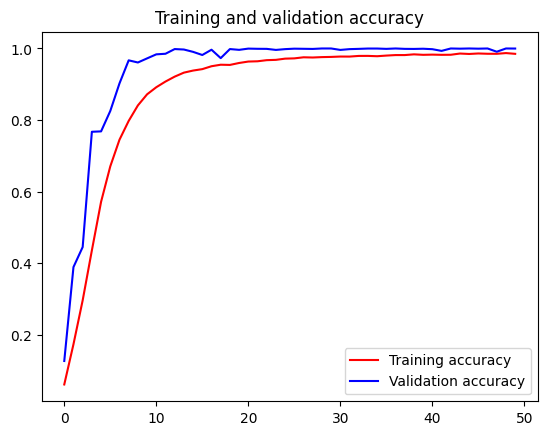

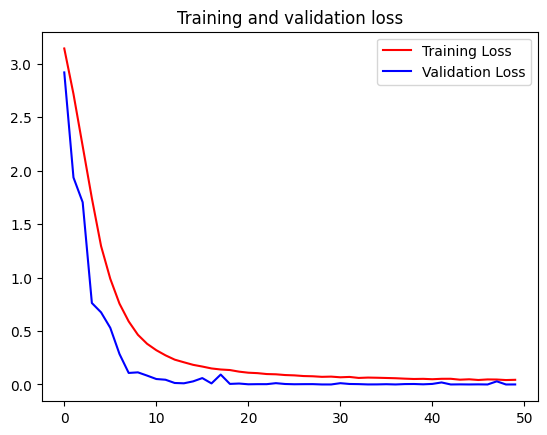

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

# plotting the heatmap
hm = sn.heatmap(data=,
                annot=annot)
  
# displaying the plotted heatmap
plt.show()